In [1]:
# run this if packages are not installed
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install dash
!pip install plotly
!pip install dash-core-components
!pip install dash-html-components
!pip install dash-bootstrap-components
!pip install dash-table
!pip install jupyter-dash
!pip install mlxtend

     |████████████████████████████████| 9.6 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 28.8 MB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 421 kB 13.7 MB/s eta 0:00:01
     |████████████████████████████████| 210 kB 809 kB/s eta 0:00:01


  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=60eedde1ada1861fbe3c741ba5a8e84c285a70e13dc137459328a75ad3e9355b
  Stored in directory: /Users/richardloh/Library/Caches/pip/wheels/ce/18/7f/e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying


In [4]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 842 kB/s eta 0:00:01


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules
import itertools
# deployment
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Output, Input
import plotly.express as px
import dash_bootstrap_components as dbc
import plotly.graph_objects as go
import dash_table as dtable
from jupyter_dash import JupyterDash
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/var/folders/6n/sl0kknls5jx236g31c0km15m0000gn/T/ipykernel_4373/3889262564.py:13: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/6n/sl0kknls5jx236g31c0km15m0000gn/T/ipykernel_4373/3889262564.py:14: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/var/folders/6n/sl0kknls5jx236g31c0km15m0000gn/T/ipykernel_4373/3889262564.py:19: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dtable


In [2]:
# The first thing that needs to be done is to merge those two sheets
# of excel file into one single data frame.
link = './online-retail-dataset.xlsx'
excel_file = pd.read_excel(link, sheet_name = None)
df = pd.concat(excel_file.values())
# drop duplicates
df = df.drop_duplicates(ignore_index = True)

In [3]:
df.rename(index=str, columns={"Invoice":"invoice_id",
                              "StockCode":"stock_code",
                              "Description":"description",
                              "Quantity":"quantity",
                              "InvoiceDate":"invoice_date",
                              "Price":"price",
                              "Customer ID":"customer_id",
                              "Country":"country"},
         inplace=True)

## Data Exploration

In [4]:
df1 = df.copy()

In [5]:
df

invoice_id stock_code                          description  quantity  \
0           489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1           489434     79323P                   PINK CHERRY LIGHTS        12   
2           489434     79323W                  WHITE CHERRY LIGHTS        12   
3           489434      22041         RECORD FRAME 7" SINGLE SIZE         48   
4           489434      21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...            ...        ...                                  ...       ...   
1033031     581587      22899         CHILDREN'S APRON DOLLY GIRL          6   
1033032     581587      23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1033033     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1033034     581587      22138        BAKING SET 9 PIECE RETROSPOT          3   
1033035     581587       POST                              POSTAGE         1   

               invoice_date  price  customer_id         country  
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                     ...    ...          ...             ...  
1033031 2011-12-09 12:50:00   2.10      12680.0          France  
1033032 2011-12-09 12:50:00   4.15      12680.0          France  
1033033 2011-12-09 12:50:00   4.15      12680.0          France  
1033034 2011-12-09 12:50:00   4.95      12680.0          France  
1033035 2011-12-09 12:50:00  18.00      12680.0          France  

[1033036 rows x 8 columns]

In [6]:
df.head(10)

invoice_id stock_code                          description  quantity  \
0     489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1     489434     79323P                   PINK CHERRY LIGHTS        12   
2     489434     79323W                  WHITE CHERRY LIGHTS        12   
3     489434      22041         RECORD FRAME 7" SINGLE SIZE         48   
4     489434      21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5     489434      22064           PINK DOUGHNUT TRINKET POT         24   
6     489434      21871                  SAVE THE PLANET MUG        24   
7     489434      21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8     489435      22350                            CAT BOWL         12   
9     489435      22349       DOG BOWL , CHASING BALL DESIGN        12   

         invoice_date  price  customer_id         country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5 2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7 2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9 2009-12-01 07:46:00   3.75      13085.0  United Kingdom

In [7]:
df.describe()

quantity         price    customer_id
count  1.033036e+06  1.033036e+06  797885.000000
mean   1.007688e+01  4.613980e+00   15313.062777
std    1.751976e+02  1.223975e+02    1696.466663
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13964.000000
50%    3.000000e+00  2.100000e+00   15228.000000
75%    1.000000e+01  4.150000e+00   16788.000000
max    8.099500e+04  3.897000e+04   18287.000000

# 1. Top 10 country with the most purchases

Text(0.5, 1.0, 'top 10 countries with the most orders')

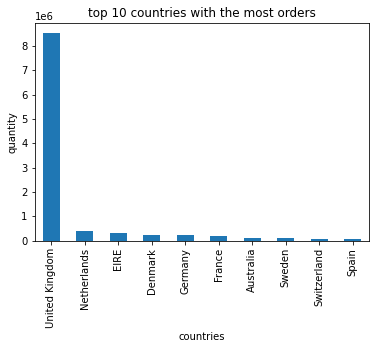

In [8]:
# group by the countries
countries = df1.groupby('country').sum()
countries = countries.sort_values(by='quantity',ascending=False)[0:10]
countries['quantity'].plot(kind='bar')
# set the title and labels
plt.xlabel('countries')
plt.ylabel('quantity')
plt.title('top 10 countries with the most orders')

# 2. scatterplot of quantity per unit price (how much of a price for a quantity)

In [9]:
# Excluding negative quantity
df2 = df[df.quantity>0]
df2 = df2[df2.country=='United Kingdom']
df2.head()

invoice_id stock_code                          description  quantity  \
0     489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1     489434     79323P                   PINK CHERRY LIGHTS        12   
2     489434     79323W                  WHITE CHERRY LIGHTS        12   
3     489434      22041         RECORD FRAME 7" SINGLE SIZE         48   
4     489434      21232       STRAWBERRY CERAMIC TRINKET BOX        24   

         invoice_date  price  customer_id         country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

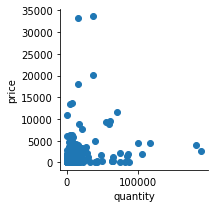

In [10]:
customers = df2.groupby('customer_id').sum()
# removing negative price
customers = customers[customers.price > 0]
g = sns.FacetGrid(customers)
g.map(plt.scatter, "quantity", "price", alpha=1)
g.add_legend()

# 3. products most bought in the Uk

Text(0.5, 1.0, 'top 10 products most bought in the UK')

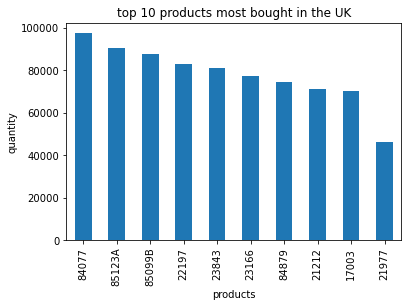

In [11]:
product = df2.groupby('stock_code', as_index=False)['quantity'].sum().sort_values(by='quantity',ascending=False)[0:10]
product.set_index('stock_code',inplace=True)
product['quantity'].plot(kind='bar')
# set the title and labels
plt.xlabel('products')
plt.ylabel('quantity')
plt.title('top 10 products most bought in the UK')

# 3. top 10 invoice that has the highest sales

Text(0.5, 1.0, 'top 10 invoice that has the highest sales')

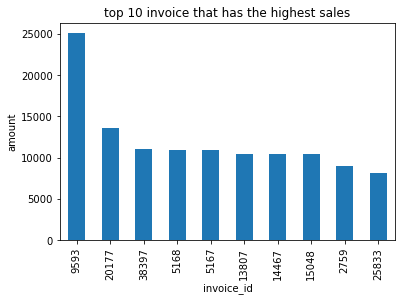

In [12]:
invoice_price = df2.groupby('invoice_id',as_index=False)['price'].sum().sort_values(by='price',ascending=False)[0:10]
invoice_price['price'].plot(kind='bar')
# set the title and labels
plt.xlabel('invoice_id')
plt.ylabel('amount')
plt.title('top 10 invoice that has the highest sales')

# 4. How many orders per month

In [13]:
df3 = df2.copy()

In [14]:
df3.insert(loc=2, column='year_month', value=df3['invoice_date'].map(lambda x: 100*x.year + x.month))
df3.insert(loc=3, column='month', value=df3.invoice_date.dt.month)
df3.insert(loc=4, column='day', value=(df3.invoice_date.dt.dayofweek)+1)
df3.insert(loc=5, column='hour', value=df3.invoice_date.dt.hour)

# 5. How much was spent by the customers?

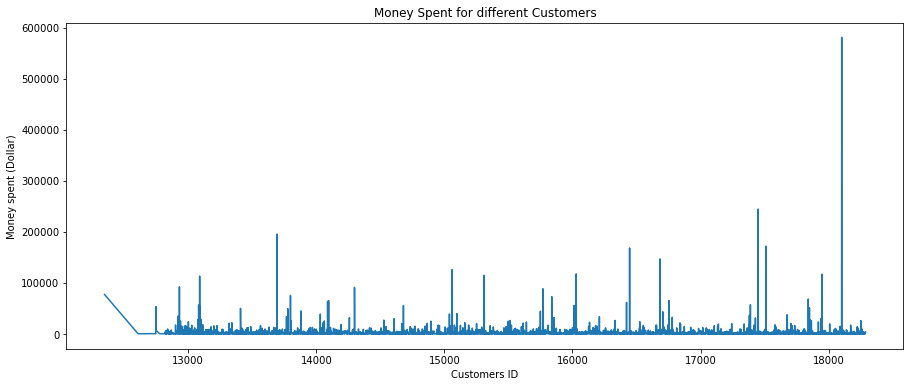

In [15]:
df3['amount_spent'] = df3['price']*df3['quantity']
money_spent = df3.groupby('customer_id',as_index=False)['amount_spent'].sum()
plt.subplots(figsize=(15,6))
plt.plot(money_spent.customer_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

# 6. Top 20 products that have the highest revenue

Text(0.5, 1.0, 'Top 20 products that have the highest revenue')

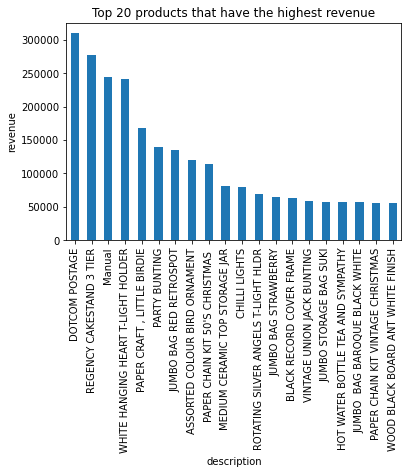

In [16]:
df4 = df3.groupby('description',as_index=False)['amount_spent'].sum().sort_values(by='amount_spent',ascending=False)[0:20]
df4.set_index('description',inplace=True)
df4['amount_spent'].plot(kind='bar')
# set the title and labels
plt.xlabel('description')
plt.ylabel('revenue')
plt.title('Top 20 products that have the highest revenue')

# Data Preparation: Data Cleaning

# Scopes
1. The dataset that will be going to use in this study is the Online Retail Dataset II that is retrieved from UCI Machine Learning Repository. (Chen et al., 2012). 
2. Online retail transactions between *2010 to 2011* will be used to train the respective descriptive models namely K-means Clustering in clustering technique and Apriori algorithm in association rule mining. Such models will be used to facilitate customer segmentation works and generate associative rules of online retail products in distinctive segments of customers. 
Therefore, the generated models will be visualised using Python Plotly package.

In [17]:
df.head(10)

invoice_id stock_code                          description  quantity  \
0     489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1     489434     79323P                   PINK CHERRY LIGHTS        12   
2     489434     79323W                  WHITE CHERRY LIGHTS        12   
3     489434      22041         RECORD FRAME 7" SINGLE SIZE         48   
4     489434      21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5     489434      22064           PINK DOUGHNUT TRINKET POT         24   
6     489434      21871                  SAVE THE PLANET MUG        24   
7     489434      21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8     489435      22350                            CAT BOWL         12   
9     489435      22349       DOG BOWL , CHASING BALL DESIGN        12   

         invoice_date  price  customer_id         country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5 2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7 2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9 2009-12-01 07:46:00   3.75      13085.0  United Kingdom

In [18]:
date_range = (df['invoice_date'] >= '2010-1-1') & (df['invoice_date'] <= '2011-12-31')
# drop those rows other than such conditions
df = df[date_range & (df["country"] == "United Kingdom")]

In [19]:
# drop the country as it is deemed unnecessary
# while doing descriptive analytics
df.drop('country',axis=1, inplace=True)

# Online shopping transactions characteristics
- description should be clearly displayed what has sold
- price should be more than zero
- quantity should be more than zero
- missing values should be imputed or deleted

In [20]:
df.shape

(905966, 7)

In [21]:
df[df['price'] <= 0].head(5)

invoice_id stock_code description  quantity        invoice_date  price  \
45203     493494      21231         NaN       -84 2010-01-04 14:56:00    0.0   
45204     493508      20887         NaN         9 2010-01-04 15:08:00    0.0   
45205     493510     40046C         NaN         7 2010-01-04 15:08:00    0.0   
45206     493509      21558         NaN         7 2010-01-04 15:08:00    0.0   
45207     493513      47009         NaN         3 2010-01-04 15:09:00    0.0   

       customer_id  
45203          NaN  
45204          NaN  
45205          NaN  
45206          NaN  
45207          NaN

In [22]:
df[df['quantity'] <= 0].head(5)

invoice_id stock_code                     description  quantity  \
44723    C493411      21539         RETRO SPOTS BUTTER DISH        -1   
44734    C493415      21527  RETRO SPOT TRADITIONAL TEAPOT         -3   
44735    C493426      22109    FULL ENGLISH BREAKFAST PLATE        -1   
44778    C493430      21556    CERAMIC STRAWBERRY MONEY BOX        -1   
44779    C493430      21232  STRAWBERRY CERAMIC TRINKET BOX        -2   

             invoice_date  price  customer_id  
44723 2010-01-04 09:43:00   4.25      14590.0  
44734 2010-01-04 10:33:00   7.95      14590.0  
44735 2010-01-04 10:41:00   3.39      16550.0  
44778 2010-01-04 11:43:00   2.55      14680.0  
44779 2010-01-04 11:43:00   1.25      14680.0

In [23]:
df.isna().sum()

invoice_id           0
stock_code           0
description       4047
quantity             0
invoice_date         0
price                0
customer_id     218839
dtype: int64

- notice that there is also transactions that does not have customer_id. customer_id is important to identify which customer has purchased the product. Therefore, such transactions with null customer_id needs to be removed.

In [24]:
df.drop(df[df.price <= 0.0].index, inplace=True)
df.drop(df[df.quantity <= 0.0].index, inplace=True)
df.drop(df[df.customer_id.isnull()].index, inplace=True)
df.reset_index(inplace=True)

- description should be clearly displayed what has sold. However, the distinct descriptions do not tally with the unique code that has been assigned to different kinds of items. Therefore, further data cleaning needs to be done.

In [25]:
# number of distinct items vs number of distinct descriptions
print("total number of distinct stock codes (items): ", df["stock_code"].nunique())
print("total number of distinct item name (description): ", df["description"].nunique())

total number of distinct stock codes (items):  4491
total number of distinct item name (description):  5113


- the developer had discovered that most of the stock code consist of 
1. 5 numbers or 
2. 5 numbers + 1 alphabet or 
3. 5 numbers + 2 alphabet (considered as variations).
- Therefore, stock code other than this criteria needs to be observed and delete it if necessary.

In [26]:
df[df.stock_code.str.match(r'(^\d{5})')==False]['description'].unique()

array(['This is a test product.', 'Manual', 'PADS TO MATCH ALL CUSHIONS',
       'Adjustment by john on 26/01/2010 16',
       'Adjustment by john on 26/01/2010 17', 'CARRIAGE', ' Bank Charges',
       'Bank Charges', 'Discount', 'Adjustment by Peter on Jun 25 2010 ',
       'POSTAGE', "KID'S CHALKBOARD/EASEL", 'DOTCOM POSTAGE'],
      dtype=object)

In [27]:
df[df.stock_code.str.match(r'(^\d{5})')==False]['stock_code'].unique()

array(['TEST001', 'M', 'PADS', 'ADJUST', 'C2', 'BANK CHARGES', 'D',
       'ADJUST2', 'POST', 'SP1002', 'DOT'], dtype=object)

In [28]:
df.drop(df[df['stock_code'] == "TEST001"].index, inplace = True)
df.drop(df[df['stock_code'] == "M"].index, inplace = True)
df.drop(df[df['stock_code'] == "PADS"].index, inplace = True)
df.drop(df[df['stock_code'] == "ADJUST"].index, inplace = True)
df.drop(df[df['stock_code'] == "C2"].index, inplace = True)
df.drop(df[df['stock_code'] == "BANK CHARGES"].index, inplace = True)
df.drop(df[df['stock_code'] == "D"].index, inplace = True)
df.drop(df[df['stock_code'] == "ADJUST2"].index, inplace = True)
df.drop(df[df['stock_code'] == "POST"].index, inplace = True)
df.drop(df[df['stock_code'] == "DOT"].index, inplace = True)

In [29]:
df.description = df.description.replace('\s+', ' ', regex=True)
df.description = df.description.str.upper()
df.description = df.description.str.strip()

In [30]:
# replace description based on the mode() of given stock_code
stock_list = df.stock_code.unique().tolist()
for stock in stock_list:
    most_frequent = df[df["stock_code"] == stock]["description"].mode()[0]
    df.loc[df['stock_code'] == stock, "description"] = most_frequent

In [31]:
descriptions = df.description.unique()
for description in descriptions:
    most_frequent = df[df["description"] == description]["stock_code"].mode()[0]
    df.loc[df['description'] == description, "stock_code"] = most_frequent

In [32]:
# number of distinct items vs number of distinct descriptions
print("total number of distinct stock codes (items): ", df["stock_code"].nunique())
print("total number of distinct item name (description): ", df["description"].nunique())
print("total number of distinct customers (customer_id): ", df["customer_id"].nunique())

total number of distinct stock codes (items):  4445
total number of distinct item name (description):  4445
total number of distinct customers (customer_id):  5248


- "several customers have visited the stores only one or two times. Since periodicity and recency for customers who have visited the stores a few times is considered useless, we excluded the customers who have visited the stores less than three times." (Peker et al., 2017).
1. Recency:  it indicates how up-to-date the interaction of a customer with the company is, and gives information about the repeat purchase tendency.
2. Periodicity: This feature indicates whether the customers would visit the stores regularly by calculating the standard deviation of the inter-transaction times done by the customers.
- As the developer is going to calculate the recency and periodicity of the customers by calculating the average days of last three purchases date with the last transaction period, customers that had less than three transactions will be excluded.
- Furthermore, some customers had performed different invoice_id at the same time (with the same timestamp). Such transactions are also require to be deleted to calculate length, recency, and timestamp that are more than 0

In [33]:
# k: customer_id
# v: transactions
for k,v in df.groupby("customer_id")["invoice_id"].unique().items():
    if(len(v) < 3):
        df = df.drop(df[df['customer_id'] == k].index)

In [34]:
for k,v in df.groupby("customer_id")["invoice_date"].unique().items():
    if(len(v) < 3):
        df = df.drop(df[df['customer_id'] == k].index)

In [35]:
df_cleaned = df.copy()

In [36]:
df.to_csv("cleaned(23-3-2022).csv")

## Feature Engineering

- *length (days between customers' first and last visit)
- *recency (average days of customer's last 3 purchases)
- *frequency (customers' total number of purchases)
- *monetary (average amount of money spent per transactions)
- periodicity (standard deviation of the customer's inter-transaction times)

- *length feature (days between customers' first and last visit)

In [37]:
# checkpoint
df = pd.read_csv("./cleaned(23-3-2022).csv")
df_cleaned = df.copy()

In [38]:
# convert invoice_date to minutes
# affected: length, recency, periodicity
#df['new'] = df['usage_duration'].dt.total_seconds().div(60).astype(int)

In [39]:
# Length
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df_length = df[["customer_id","invoice_date"]]
df_length["date_copy"] = df_length["invoice_date"]
df_length.rename(columns={"invoice_date":"last_purchase",
                          "date_copy":"first_purchase"},
                inplace=True)

In [40]:
df_length1 = df_length.groupby(['customer_id'], as_index=False).agg({"first_purchase":np.min,
                                                                     "last_purchase": np.max})
# convert into seconds and divide it by 86400 to indicate days represented using decimals
df_length1["length"] = (df_length1["last_purchase"] - df_length1["first_purchase"]).dt.total_seconds()/86400

In [41]:
df_length = df_length1[['customer_id','length']]
df_length.set_index('customer_id',inplace=True)

- *recency (average days of customer's last 3 purchases on last observation period)

In [42]:
invoice_recency = df[["invoice_id","customer_id"]].drop_duplicates()
invoice_recency.set_index('invoice_id', inplace = True)
recency_s = df[['invoice_date','invoice_id']].groupby('invoice_id')["invoice_date"].agg(pd.Series.mode)
invoice_recency['invoice_time'] = recency_s

In [43]:
# add one counter to list out the last 3 purchases of each customer
invoice_recency["counter"] = invoice_recency.groupby("customer_id").cumcount(ascending=False) + 1
customer_last_three_purchases = invoice_recency["counter"].isin([1,2,3])
df_recency = invoice_recency.loc[customer_last_three_purchases,["customer_id","counter","invoice_time"]].copy()
# observation period: the last day of online retail transactions
last_date = max(df['invoice_date'])

In [44]:
# differences between last observation period with the customer's purchase
diff = lambda x: (last_date - x)
df_recency['recency'] = (df_recency.groupby('customer_id')['invoice_time'].transform(diff)).dt.total_seconds()/86400
df_recency = df_recency.groupby(['customer_id'], as_index=False).agg({"recency":np.mean,
                                                                   "counter":np.max})

In [45]:
df_recency['recency'] = np.round(df_recency['recency'],decimals=2)
df_recency.set_index('customer_id', inplace=True)
df_recency.drop('counter',axis=1,inplace=True)

In [46]:
df_recency

recency
customer_id         
12346.0       500.35
12747.0        29.98
12748.0         0.47
12749.0        51.72
12820.0        40.31
...              ...
18273.0       118.03
18276.0       288.79
18277.0       290.27
18283.0         9.33
18287.0       100.44

[2940 rows x 1 columns]

- *frequency (customers' total number of purchases throughout the observation period, calculated via invoice count) 

In [47]:
df_frequency = df.groupby('customer_id')['invoice_id'].nunique()
df_frequency

customer_id
12346.0      3
12747.0     23
12748.0    315
12749.0      9
12820.0     10
          ... 
18273.0      4
18276.0      5
18277.0      5
18283.0     22
18287.0      7
Name: invoice_id, Length: 2940, dtype: int64

- *monetary (average amount of money spent per transactions/visits)
- this requires extra processing to group all the split transactions into one single invoices

In [48]:
# total_price = price * quantity
df["total_price"] = df["price"]*df["quantity"]
# 1. group by invoice id, sum all of them
invoices = df.groupby('invoice_id')['total_price'].sum()
customers = df[["invoice_id","customer_id"]].drop_duplicates(ignore_index = True)
# 2. group by customer_id, mean all of their invoice_id
customers = customers.set_index('invoice_id')
customers['invoice_price'] = invoices
df_monetary = customers.groupby('customer_id')['invoice_price'].mean()

In [49]:
df_monetary

customer_id
12346.0    25784.320000
12747.0      342.020870
12748.0      150.303270
12749.0      760.817778
12820.0      254.122000
               ...     
18273.0       89.250000
18276.0      287.694000
18277.0      236.010000
18283.0      120.861364
18287.0      590.427143
Name: invoice_price, Length: 2940, dtype: float64

- periodicity (standard deviation of the customer's inter-visit times)

IVT denotes the inter-visit time.
IVT is the elapsed time in days between two consecutive visits of the customer.

In [50]:
# the developer only need the time where the customer made the purchase
# therefore, only two columns have been selected.
periodicity = df[['invoice_date','customer_id']].drop_duplicates()

In [51]:
periodicity["customer_id"].value_counts()

12748.0    316
17841.0    203
15311.0    193
13089.0    193
14606.0    178
          ... 
15466.0      3
16140.0      3
17295.0      3
13000.0      3
16139.0      3
Name: customer_id, Length: 2940, dtype: int64

In [52]:
#1. loop through the unique customers
customers_stdev = {
    "customer_id":[],
    "standard_deviation":[]
}
for cust_id in periodicity.customer_id.unique().tolist():
    customers_stdev["customer_id"].append(cust_id)
    intervals = []
    #2. through the time in descending order (latest to first purchase)
    #   subtract and get the differences
    transactions = periodicity[periodicity['customer_id'] == cust_id]['invoice_date'].tolist()
    transactions.sort()
    for t in range(len(transactions)-1):
        interval = (transactions[t+1] - transactions[t]).total_seconds()/86400
        intervals.append(interval)
    #3. using standard deviation as a function to calculate stdev of the durations
    st_dev = np.std(intervals)
    #4. store the stdev as a new df togethered with customer_id.
    customers_stdev["standard_deviation"].append(st_dev)
# convert dictionary into dataframe
df_periodicity = pd.DataFrame(customers_stdev)
df_periodicity.set_index("customer_id",inplace=True)

In [53]:
df_periodicity.describe()

standard_deviation
count         2940.000000
mean            57.050663
std             46.270524
min              0.000347
25%             23.829238
50%             45.224979
75%             76.875737
max            306.408681

- merge five features altogether

In [54]:
lrfmp = pd.merge(df_length, df_recency, on='customer_id', how='inner')
lrfmp = pd.merge(lrfmp, df_frequency, on='customer_id', how='inner')
lrfmp = pd.merge(lrfmp, df_monetary, on='customer_id', how='inner')
lrfmp = pd.merge(lrfmp, df_periodicity, on='customer_id', how='inner')
lrfmp.columns = ['length','recency','frequency','monetary','periodicity']

In [55]:
lrfmp.describe()

length      recency    frequency      monetary  periodicity
count  2940.000000  2940.000000  2940.000000   2940.000000  2940.000000
mean    420.650177   197.617895     9.786395    371.274563    57.050663
std     197.591177   158.526455    14.217528    658.300506    46.270524
min       0.002083     0.020000     3.000000     11.647500     0.000347
25%     261.084375    59.780000     4.000000    197.224286    23.829238
50%     446.903819   156.720000     6.000000    293.098333    45.224979
75%     596.933854   308.322500    11.000000    417.074167    76.875737
max     703.122917   696.050000   315.000000  25784.320000   306.408681

In [56]:
lrfmp

length  recency  frequency      monetary  periodicity
customer_id                                                           
12346.0      321.870139   500.35          3  25784.320000    42.903819
12747.0      665.004167    29.98         23    342.020870    15.548414
12748.0      693.902083     0.47        315    150.303270     3.450533
12749.0      517.785417    51.72          9    760.817778    61.111428
12820.0      692.259722    40.31         10    254.122000    66.417785
...                 ...      ...        ...           ...          ...
18273.0      588.036111   118.03          4     89.250000   100.840436
18276.0      555.009722   288.79          5    287.694000   122.789392
18277.0      436.205556   290.27          5    236.010000   135.830567
18283.0      654.781944     9.33         22    120.861364    34.122828
18287.0      528.898611   100.44          7    590.427143    66.827771

[2940 rows x 5 columns]

In [57]:
lrfmp.to_csv("lrfmp_cleaned.csv")

# Visualising LRFMP
- lrfmp attributes need to be visualized to handle skewness

-0.41959038091541295


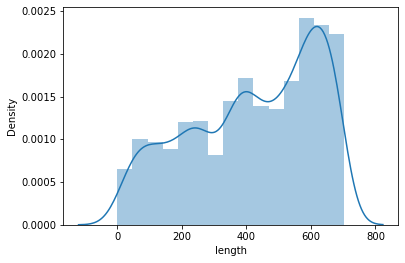

0.744807995844422


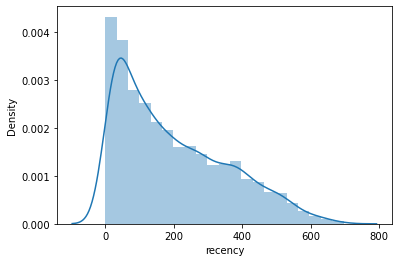

8.714899967818793


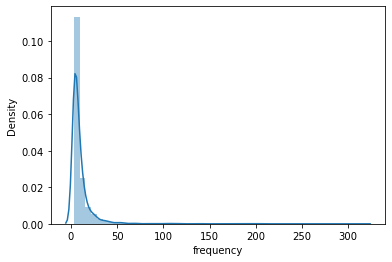

26.263508346283214


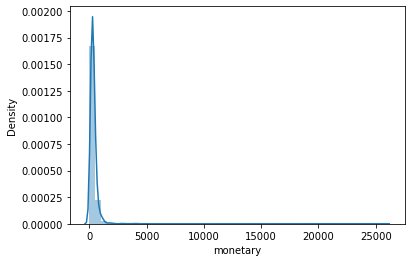

1.556007581881687


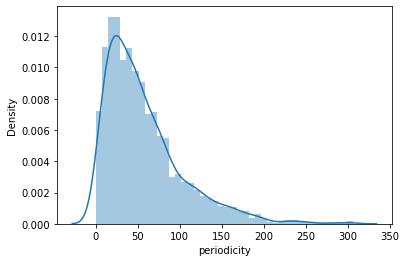

In [58]:
# positive skewness is when the tail is in the positive side.
# square root transformation, logarithmic transformation,etc.
from scipy.stats import skew
for column in lrfmp:
    print(skew(lrfmp[column]))
    plt.figure()
    sns.distplot(lrfmp[column])
    plt.show()
    #frequency and monetary are highly skewed.

In [59]:
# descriptive statistics of LRFMP values
lrfmp.describe()

length      recency    frequency      monetary  periodicity
count  2940.000000  2940.000000  2940.000000   2940.000000  2940.000000
mean    420.650177   197.617895     9.786395    371.274563    57.050663
std     197.591177   158.526455    14.217528    658.300506    46.270524
min       0.002083     0.020000     3.000000     11.647500     0.000347
25%     261.084375    59.780000     4.000000    197.224286    23.829238
50%     446.903819   156.720000     6.000000    293.098333    45.224979
75%     596.933854   308.322500    11.000000    417.074167    76.875737
max     703.122917   696.050000   315.000000  25784.320000   306.408681

In [60]:
# apply to frequency, monetary
lrfmp['log_frequency'] = np.log(lrfmp["frequency"])
lrfmp['log_monetary'] = np.log(lrfmp["monetary"])
lrfmp['sq_periodicity'] = np.sqrt(lrfmp["periodicity"])
lrfmp['sq_recency'] = np.sqrt(lrfmp["recency"])

-0.41959038091541295


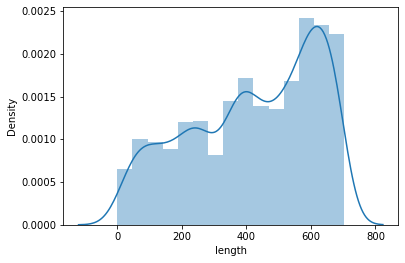

0.744807995844422


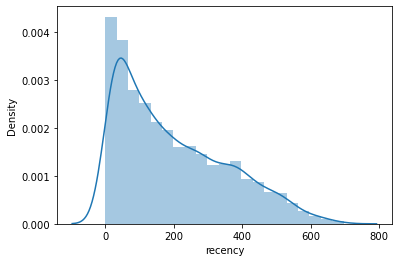

8.714899967818793


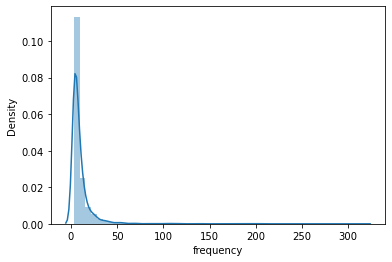

26.263508346283214


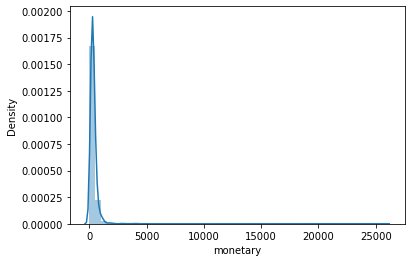

1.556007581881687


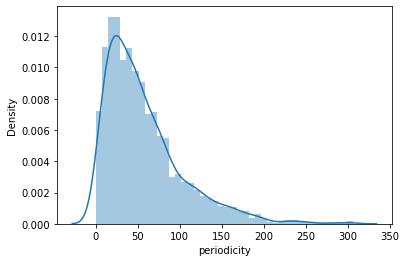

1.042034371888858


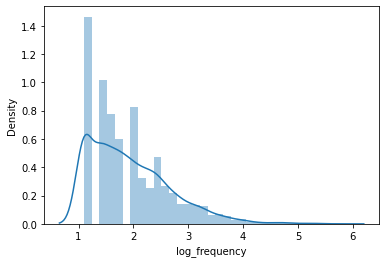

0.28815258738935645


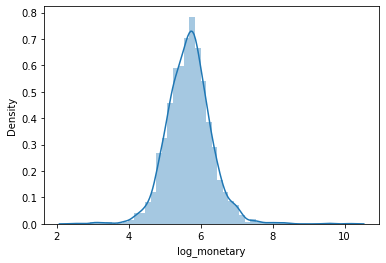

0.45235389577446616


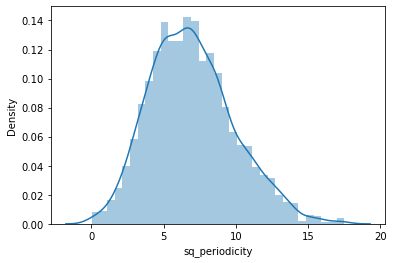

0.10761283629378979


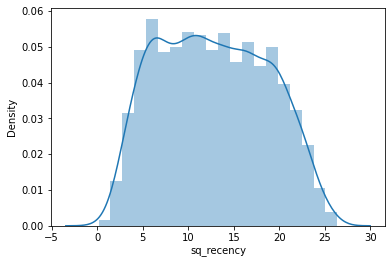

In [61]:
for column in lrfmp:
    print(skew(lrfmp[column]))
    plt.figure()
    sns.distplot(lrfmp[column])
    plt.show()

## Identifying Outliers

In [62]:
lrfmp = lrfmp.reset_index()
lrfmp1 = lrfmp[["customer_id","length","sq_recency","log_frequency","log_monetary","sq_periodicity"]]

In [63]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(100)
for column in lrfmp1:
    # generate univariate observations
    data = lrfmp1[column]
    # calculate summary statistics
    data_mean, data_std = mean(data), std(data)
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    lrfmp1 = lrfmp1[~lrfmp1[column].isin(outliers)]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 0
Non-outlier observations: 2940
Identified outliers: 0
Non-outlier observations: 2940
Identified outliers: 0
Non-outlier observations: 2940
Identified outliers: 27
Non-outlier observations: 2913
Identified outliers: 29
Non-outlier observations: 2884
Identified outliers: 13
Non-outlier observations: 2871


# Post Cleaning EDA

In [64]:
df_eda = df_cleaned.copy()[['description','quantity','price','invoice_date']]
df_eda['total'] = df_eda['quantity'] * df_eda['price']

Text(0.5, 1.0, 'Top 20 products that have the highest revenue')

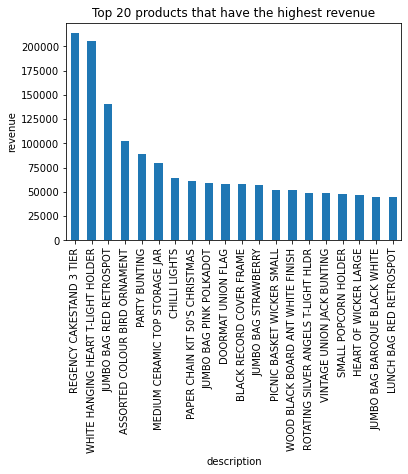

In [65]:
df_eda1 = df_eda.groupby('description',as_index=False)['total'].sum().sort_values(by='total',ascending=False)[0:20]
df_eda1.set_index('description',inplace=True)
df_eda1['total'].plot(kind='bar')
# set the title and labels
plt.xlabel('description')
plt.ylabel('revenue')
plt.title('Top 20 products that have the highest revenue')

Text(0, 0.5, 'Quantity, Total Revenue')

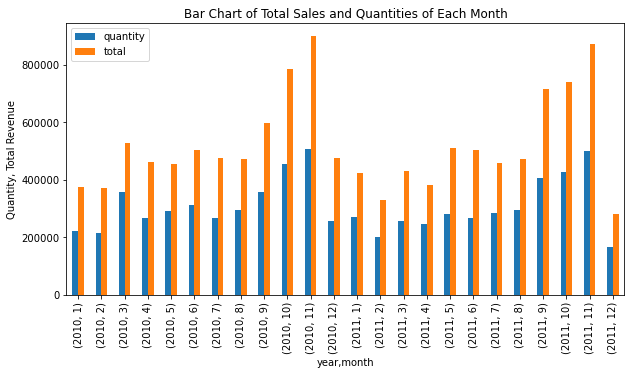

In [66]:
df_eda['invoice_date'] = pd.to_datetime(df_eda['invoice_date'])
df_eda['year'] = df_eda['invoice_date'].dt.year
df_eda['month'] = df_eda['invoice_date'].dt.month
df_eda_date = df_eda.groupby(['year','month']).sum()
df_eda_date.plot(kind='bar',figsize=(10,5),
                  title='Bar Chart of Total Sales and Quantities of Each Month',
                 y=["quantity","total"])
plt.ylabel('Quantity, Total Revenue')

Text(0.5, 1.0, 'Top 20 Sold Products')

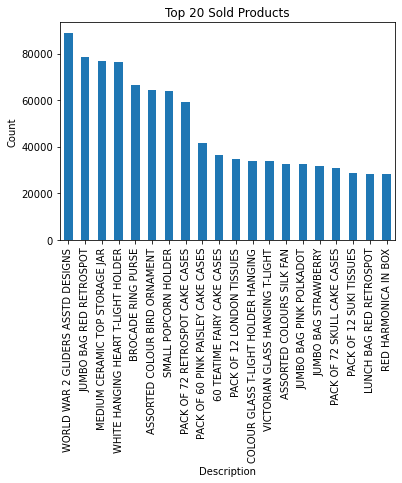

In [67]:
# top 20 products sold.
df_eda2 = df_eda.groupby('description',as_index=False)['quantity'].sum().sort_values(by='quantity',ascending=False)[0:20]
df_eda2.set_index('description',inplace=True)
df_eda2['quantity'].plot(kind='bar')
# set the title and labels
plt.xlabel('Description')
plt.ylabel('Count')
plt.title('Top 20 Sold Products')

In [68]:
lrfmp_eda = lrfmp1.copy()[['length', 'sq_recency', 'log_frequency', 'log_monetary',
       'sq_periodicity']]

In [69]:
# bivariate
df_eda = lrfmp1.copy()[['length', 'sq_recency', 'log_frequency', 'log_monetary',
       'sq_periodicity']]
corr = df_eda.corr()
corr.style.background_gradient(cmap='coolwarm')

# Evaluation: Clustering

In [70]:
lrfmp1.set_index("customer_id",inplace=True)

In [71]:
lrfmp3 = lrfmp.copy()
lrfmp3 = lrfmp3[['customer_id','length','recency','frequency','monetary','periodicity']]
lrfmp3 = lrfmp3.set_index('customer_id')

In [72]:
lrfmp3 = (lrfmp3-lrfmp3.mean())/(lrfmp3.std())

In [73]:
def plotElbowMethod(dataset):
    # within cluster sum of squared (WSS)
    wss = []
    for k in range(1,12):
        kmeans = KMeans(n_clusters=k)
        kmeans = kmeans.fit(dataset)
        wss_iter = kmeans.inertia_
        wss.append(wss_iter)
    centers = pd.DataFrame({'clusters': range(1,12),
                           'WSS':wss})
    # can choose K=3 clusters
    plt.figure(figsize=(5,5))
    plt.plot(range(1,12), wss, 'bx-')
    plt.xlabel('Clusters')
    plt.ylabel('WSS')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

###### Silhouette Score
- (𝑝−𝑞)/𝑚𝑎𝑥(𝑝,𝑞)

# Plotting Silhouette Score and DB index

In [74]:
from sklearn.metrics import davies_bouldin_score
# silhouette coefficient to identify
# the optimal number of clusters
def calculateSilhouette(df):
    silhouettes = []
    for k in range(2,13):
        kmeans = KMeans(n_clusters=k, max_iter=50)
        kmeans.fit(df)
        cluster_labels = kmeans.labels_
        # calculate silhouette score
        silhouette = silhouette_score(df, cluster_labels,metric="euclidean")
        silhouettes.append(silhouette)
        print("If k={0}, the silhouette score will be {1}".format(k,silhouette))
    return silhouettes

def calculateDbIndex(df):
    dbIndexes = []
    for k in range(2,13):
        kmeans = KMeans(n_clusters=k, max_iter=50)
        kmeans.fit(df)
        cluster_labels = kmeans.labels_
        # calculate db index
        davies_bouldin = davies_bouldin_score(df, cluster_labels)
        dbIndexes.append(davies_bouldin)
        print("If k={0}, the DB index will be {1}".format(k,davies_bouldin))
    return dbIndexes

In [75]:
#normalise lrfmp1 using min-max normalisation
#to examine silhouette score
x = lrfmp1.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [76]:
# can choose K=3 clusters
def plotEvaluationMetrics(metrics, title):
    plt.figure(figsize=(5,5))
    plt.plot(range(2,13), metrics, 'bx-')
    plt.xlabel('Clusters')
    plt.ylabel("Metrics")
    plt.title(title)
    plt.show()

In [77]:
original = lrfmp[["customer_id","length","recency","frequency","monetary","periodicity"]]
original = original.set_index("customer_id")

---------------silhouette score with transformed LRFMP features using log and sqrt----------------
If k=2, the silhouette score will be 0.6254320610570088
If k=3, the silhouette score will be 0.612075927806416
If k=4, the silhouette score will be 0.5917664516704597
If k=5, the silhouette score will be 0.568991334368785
If k=6, the silhouette score will be 0.5470439232303776
If k=7, the silhouette score will be 0.5345893568331006
If k=8, the silhouette score will be 0.5376774754011278
If k=9, the silhouette score will be 0.5317571753512419
If k=10, the silhouette score will be 0.5177964342662406
If k=11, the silhouette score will be 0.5058457332484703
If k=12, the silhouette score will be 0.4962978860983139


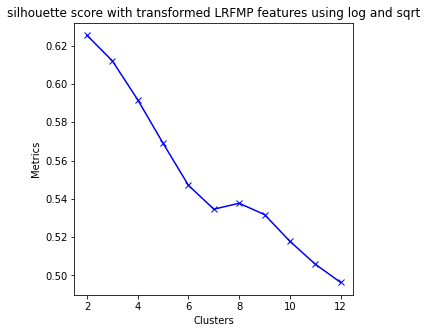

---------------silhouette score with original features----------------
If k=2, the silhouette score will be 0.974081148123357
If k=3, the silhouette score will be 0.5642558541830701
If k=4, the silhouette score will be 0.33230339789867125
If k=5, the silhouette score will be 0.33239051928127916
If k=6, the silhouette score will be 0.3385105410478436
If k=7, the silhouette score will be 0.3464498707277442
If k=8, the silhouette score will be 0.3090300062698466
If k=9, the silhouette score will be 0.3075216210432914
If k=10, the silhouette score will be 0.3047766002497865
If k=11, the silhouette score will be 0.3015014409832525
If k=12, the silhouette score will be 0.2968517010116489


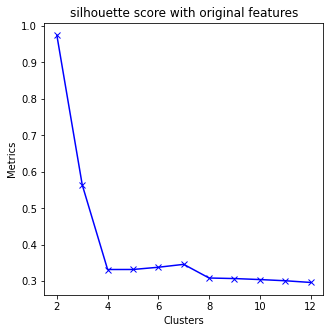

---------------silhouette with min-max normalisation----------------
If k=2, the silhouette score will be 0.3144271284899162
If k=3, the silhouette score will be 0.2922304205540143
If k=4, the silhouette score will be 0.2959764510712306
If k=5, the silhouette score will be 0.24719220786266868
If k=6, the silhouette score will be 0.23258280808688048
If k=7, the silhouette score will be 0.2236840171511577
If k=8, the silhouette score will be 0.21075648141908404
If k=9, the silhouette score will be 0.2114677079941405
If k=10, the silhouette score will be 0.2079818705361734
If k=11, the silhouette score will be 0.2099585019173682
If k=12, the silhouette score will be 0.20008727487005884


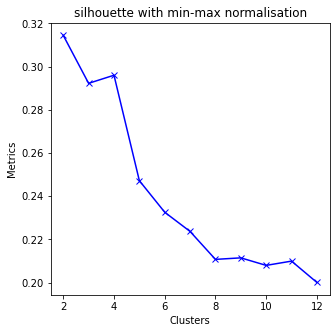

---------------silhouette with z standardisation----------------
If k=2, the silhouette score will be 0.2907894671236225
If k=3, the silhouette score will be 0.3056428794863153
If k=4, the silhouette score will be 0.3114875773956137
If k=5, the silhouette score will be 0.32761187543343046
If k=6, the silhouette score will be 0.35612550660941433
If k=7, the silhouette score will be 0.3264580108280988
If k=8, the silhouette score will be 0.3092774033005609
If k=9, the silhouette score will be 0.2970992881750563
If k=10, the silhouette score will be 0.2955808976272069
If k=11, the silhouette score will be 0.2914012208769315
If k=12, the silhouette score will be 0.2774958019370603


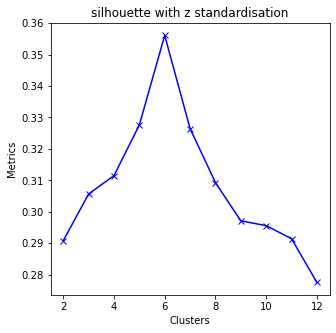

---------------DB index with transformed LRFMP features using log and sqrt----------------
If k=2, the DB index will be 0.5031670923142622
If k=3, the DB index will be 0.4803780130992919
If k=4, the DB index will be 0.4904797327341056
If k=5, the DB index will be 0.5085531551383548
If k=6, the DB index will be 0.5235569078668835
If k=7, the DB index will be 0.5364772424965165
If k=8, the DB index will be 0.5329271244378897
If k=9, the DB index will be 0.5448484947068435
If k=10, the DB index will be 0.5610285508434014
If k=11, the DB index will be 0.5674805372512008
If k=12, the DB index will be 0.5738384118118176


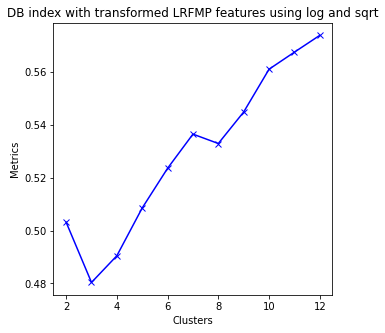

---------------DB index with min-max normalisation----------------
If k=2, the DB index will be 1.2437033689491466
If k=3, the DB index will be 1.2306042169374125
If k=4, the DB index will be 1.1636081908379259
If k=5, the DB index will be 1.2966598867034018
If k=6, the DB index will be 1.412818079977547
If k=7, the DB index will be 1.4308959637944014
If k=8, the DB index will be 1.4113281201459007
If k=9, the DB index will be 1.3868337159754234
If k=10, the DB index will be 1.3956455723075156
If k=11, the DB index will be 1.365513719926117
If k=12, the DB index will be 1.3924714499002155


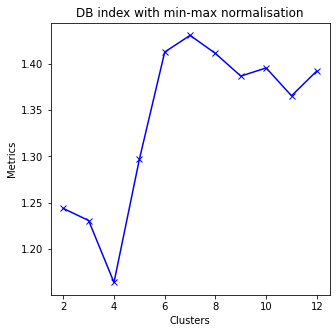

---------------DB index with original features----------------
If k=2, the DB index will be 0.31324195376846253
If k=3, the DB index will be 0.6974572045052682
If k=4, the DB index will be 0.8846155023153487
If k=5, the DB index will be 0.67250022681523
If k=6, the DB index will be 0.6546713233262627
If k=7, the DB index will be 0.6775008756344081
If k=8, the DB index will be 0.7496213864587067
If k=9, the DB index will be 0.7601909133376924
If k=10, the DB index will be 0.7963226409709978
If k=11, the DB index will be 0.787972989949764
If k=12, the DB index will be 0.8337033572019056


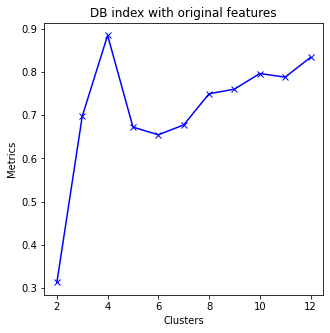

---------------DB index with z standardisation----------------
If k=2, the DB index will be 1.4276263481845362
If k=3, the DB index will be 1.1424589542780497
If k=4, the DB index will be 0.9316680697538142
If k=5, the DB index will be 0.8360997264853003
If k=6, the DB index will be 0.798347482295029
If k=7, the DB index will be 0.8551819282868248
If k=8, the DB index will be 0.9277286700405531
If k=9, the DB index will be 0.9840008465497304
If k=10, the DB index will be 0.9623062254595475
If k=11, the DB index will be 0.8636485495813466
If k=12, the DB index will be 0.8826854866575317


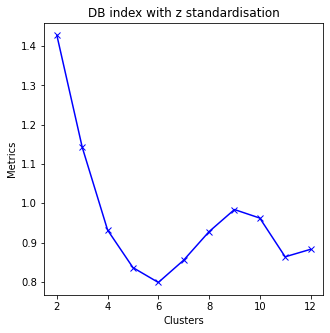

---------------Elbow method with transformed LRFMP features using log and sqrt----------------


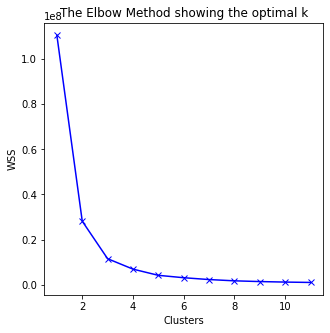

---------------Elbow method with min-max normalisation----------------


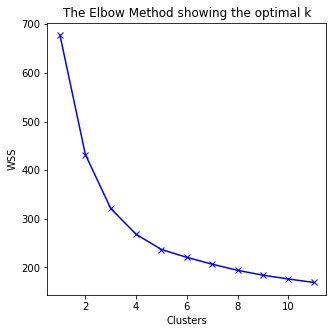

---------------Elbow method with original features----------------


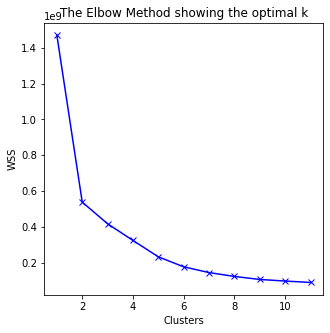

---------------Elbow method with z standardisation----------------


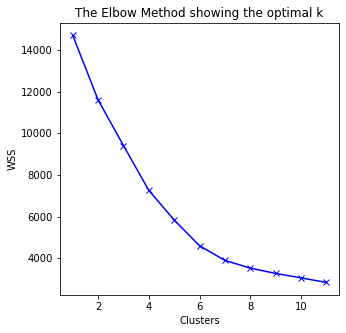

In [78]:
# silhouette score for scaled lrfmp attributes
print('---------------silhouette score with transformed LRFMP features using log and sqrt----------------')
plotEvaluationMetrics(calculateSilhouette(lrfmp1), 'silhouette score with transformed LRFMP features using log and sqrt')
print('---------------silhouette score with original features----------------')
plotEvaluationMetrics(calculateSilhouette(original), 'silhouette score with original features')
print('---------------silhouette with min-max normalisation----------------')
plotEvaluationMetrics(calculateSilhouette(df), 'silhouette with min-max normalisation')
print('---------------silhouette with z standardisation----------------')
plotEvaluationMetrics(calculateSilhouette(lrfmp3), 'silhouette with z standardisation')


print('---------------DB index with transformed LRFMP features using log and sqrt----------------')
plotEvaluationMetrics(calculateDbIndex(lrfmp1), 'DB index with transformed LRFMP features using log and sqrt')
print('---------------DB index with min-max normalisation----------------')
plotEvaluationMetrics(calculateDbIndex(df), 'DB index with min-max normalisation')
print('---------------DB index with original features----------------')
plotEvaluationMetrics(calculateDbIndex(original), 'DB index with original features')
print('---------------DB index with z standardisation----------------')
plotEvaluationMetrics(calculateDbIndex(lrfmp3), 'DB index with z standardisation')

print('---------------Elbow method with transformed LRFMP features using log and sqrt----------------')
plotElbowMethod(lrfmp1)
print('---------------Elbow method with min-max normalisation----------------')
plotElbowMethod(df)
print('---------------Elbow method with original features----------------')
plotElbowMethod(original)
print('---------------Elbow method with z standardisation----------------')
plotElbowMethod(lrfmp3)

## Investigating the reason of high silhouette score if using original features and K=2
- the result is extremely imbalanced and hence the approach should be given up

In [79]:
# selected clusters = 2
kmeans = KMeans(n_clusters = 2)
kmeans.fit(original)
original['cluster'] = kmeans.labels_

In [80]:
original.cluster.value_counts()

0    2937
1       3
Name: cluster, dtype: int64

# Modelling: of K-Means Clustering

In [81]:
# selected clusters = 3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(lrfmp1)
lrfmp1['cluster'] = kmeans.labels_

In [82]:
lrfmp1['cluster'].value_counts()

2    1209
0     885
1     777
Name: cluster, dtype: int64

# Evaluation of Descriptive Models

In [83]:
from sklearn.cluster import AgglomerativeClustering

In [84]:
# Perform the hierarchical clustering
for k in range(2,13):
    hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')
    # calculate silhouette score
    lrfmp1_hc = hc.fit_predict(lrfmp1)
    silhouette = silhouette_score(lrfmp1, lrfmp1_hc,metric="euclidean")
    print("If k={0}, the silhouette score will be {1}".format(k,silhouette))

If k=2, the silhouette score will be 0.6225552892362421
If k=3, the silhouette score will be 0.5970645112172959
If k=4, the silhouette score will be 0.5911242835368148
If k=5, the silhouette score will be 0.5095776943029514
If k=6, the silhouette score will be 0.5210892765011003
If k=7, the silhouette score will be 0.521125700864024
If k=8, the silhouette score will be 0.50404191126658
If k=9, the silhouette score will be 0.5020007914264456
If k=10, the silhouette score will be 0.5019140583219555
If k=11, the silhouette score will be 0.46382330085117196
If k=12, the silhouette score will be 0.4552956369606931


# Visualizations

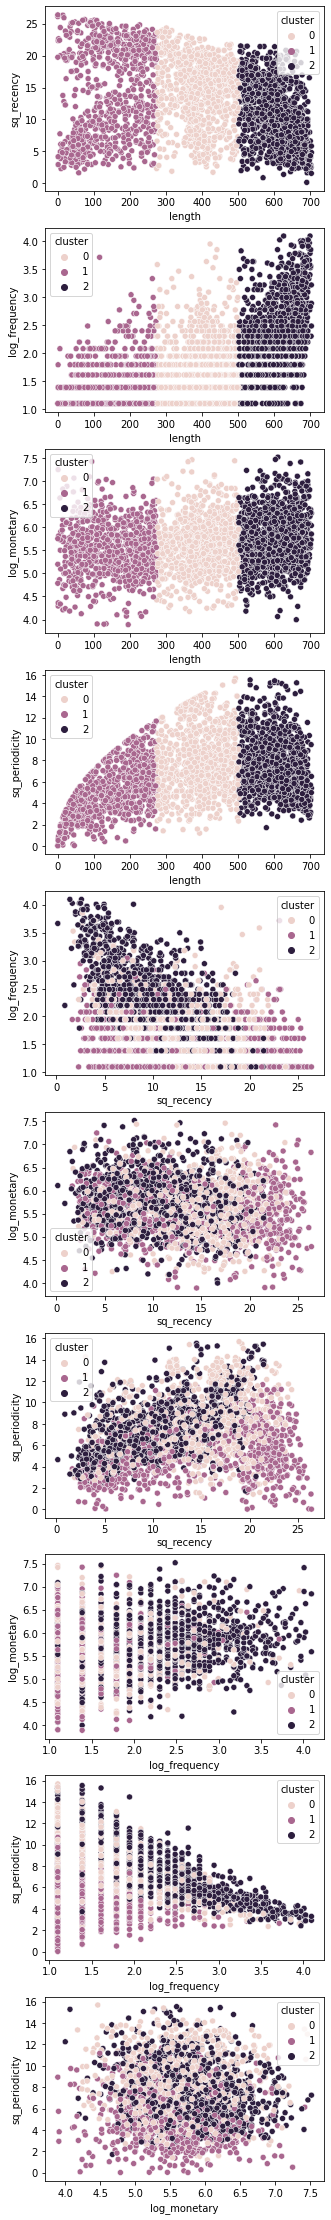

In [85]:
temp = lrfmp1[["length","sq_recency","log_frequency","log_monetary","sq_periodicity"]]
fig, ax = plt.subplots(10,1,figsize=(5,40))
for i,c in enumerate(itertools.combinations(temp.columns,2)):
#     sns.scatterplot(x=c[0],y=c[1],hue="cluster",data=lrfmp1)
    sns.scatterplot(data=lrfmp1,x=str(c[0]),y=str(c[1]),hue='cluster',ax=ax[i])

<AxesSubplot:xlabel='cluster', ylabel='length'>

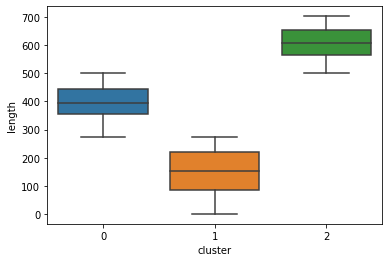

In [86]:
# Box plot to viz cluster vs length
sns.boxplot(x='cluster',y='length',data=lrfmp1)

<AxesSubplot:xlabel='cluster', ylabel='sq_recency'>

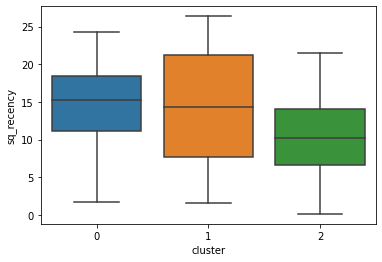

In [87]:
# Box plot to viz cluster vs recency
sns.boxplot(x='cluster',y='sq_recency',data=lrfmp1)

<AxesSubplot:xlabel='cluster', ylabel='log_frequency'>

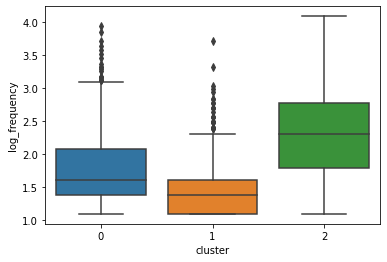

In [88]:
# Box plot to viz cluster vs frequency
sns.boxplot(x='cluster',y='log_frequency',data=lrfmp1)

<AxesSubplot:xlabel='cluster', ylabel='log_monetary'>

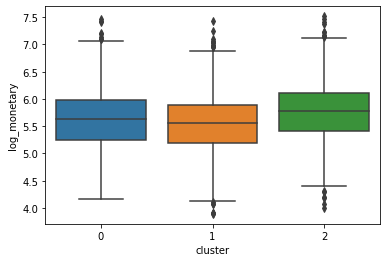

In [89]:
# Box plot to viz cluster vs monetary
sns.boxplot(x='cluster',y='log_monetary',data=lrfmp1)

<AxesSubplot:xlabel='cluster', ylabel='sq_periodicity'>

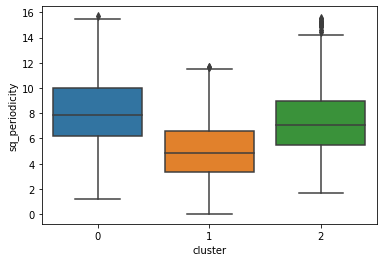

In [90]:
# Box plot to viz cluster vs periodicity
sns.boxplot(x='cluster',y='sq_periodicity',data=lrfmp1)

Feature Engineering
*length (days between customers' first and last visit)
*recency (average days of customer's last 3 purchases)
*frequency (customers' total number of purchases)
*monetary (average amount of money spent per transactions)
periodicity (standard deviation of the customer's inter-transaction times)
*length feature (days between customers' first and last visit)

In [91]:
# summarising findings of clusters
def lrfmp_values(df):
    df_new = df.groupby(['cluster']).agg({
        'length':['mean'],
        'recency':['mean'],
        'frequency':['mean','sum'],
        'monetary':['mean','sum'],
        'periodicity':['mean']
    }).round(0)
    for k in df.cluster.unique():
        filt = df.cluster == k
        df_new['total_amt'] = df.cluster.value_counts()
    return df_new

In [92]:
lrfmp = lrfmp.reset_index()
lrfmp1 = lrfmp1.reset_index()
df_cleaned = df_cleaned.reset_index()

In [93]:
for customer in lrfmp1['customer_id']:
    cluster_value = int(lrfmp1[lrfmp1.customer_id==customer]['cluster'])
    df_cleaned.loc[df_cleaned.customer_id == customer,'cluster'] = cluster_value
    lrfmp.loc[lrfmp.customer_id == customer,'cluster'] = cluster_value

In [94]:
lrfmp = lrfmp.set_index("customer_id")
lrfmp1 = lrfmp1.set_index("customer_id")

In [95]:
lrfmp2 = lrfmp.copy()
lrfmp2 = lrfmp2.drop('sq_recency',axis=1)
lrfmp2 = lrfmp2.drop('log_frequency',axis=1)
lrfmp2 = lrfmp2.drop('log_monetary',axis=1)
lrfmp2 = lrfmp2.drop('sq_periodicity',axis=1)

In [96]:
lrfmp2.to_csv('lrfmp.csv')
df_cleaned.to_csv('transactions.csv')

# Interpreting clustering results

In [97]:
lrfmp2 = lrfmp2.reset_index()

In [98]:
df = lrfmp2[['customer_id','length', 'recency', 'frequency', 'monetary',
       'periodicity','cluster']]
df_cluster = lrfmp_values(df)

In [99]:
df_cluster
# cluster 2: high contribution loyal customers (best customer) with close relationship
# cluster 1: low contribution lost customer
# cluster 0: medium contribution uncertain customers

length recency frequency        monetary           periodicity  \
          mean    mean      mean    sum     mean       sum        mean   
cluster                                                                  
0.0      395.0   234.0       7.0   5845    327.0  289095.0        73.0   
1.0      151.0   259.0       5.0   3634    301.0  233544.0        31.0   
2.0      607.0   133.0      13.0  15646    375.0  453453.0        61.0   

        total_amt  
                   
cluster            
0.0           885  
1.0           777  
2.0          1209

# Modeling: Association rule mining using Apriori Algorithm according to the respective cluster

In [100]:
df_cleaned = df_cleaned.set_index("customer_id")

In [101]:
df = df_cleaned.copy()
# to be fixed later
df = df.dropna()

In [102]:
# hot encoding
def hot_encode(x):
    if(x<=0):
        return 0
    elif(x>=1):
        return 1

In [103]:
# association rule mining for different clusters
def clustered_association_mining(support):
    frequent_sets = []
    for cluster in df.cluster.unique():
        filt = df.cluster == cluster
        dff = df.loc[filt]
        basket = dff.groupby(['invoice_id','description'])['quantity'].sum()
        basket = basket.unstack().reset_index().fillna(0).set_index('invoice_id')
        basket = basket.applymap(hot_encode)
        frequent_items = apriori(basket,min_support=support,use_colnames=True)
        frequent_set = association_rules(frequent_items, metric="lift", min_threshold = 4)
        # setting filter to filter confidence >= 0.6
        frequent_set = frequent_set[frequent_set.confidence >= 0.6]
        # only select columns: antecedents, consequents, support, confidence, lift
        frequent_set = frequent_set[['antecedents','consequents','support','confidence','lift']]
        frequent_sets.append(frequent_set)
    return frequent_sets

In [104]:
# implement minimum support of 0.03
# to be evaluated later
freq_sets = clustered_association_mining(0.03)

In [105]:
# association rules for first cluster: uncertain customer
temp = freq_sets[0].copy()
temp['cluster'] = 0
# associations dataFrame to store rules
associations = pd.DataFrame()
# pd merge temp
associations = associations.append(temp)
freq_sets[0]

antecedents                           consequents  \
5  (RED HANGING HEART T-LIGHT HOLDER)  (WHITE HANGING HEART T-LIGHT HOLDER)   

    support  confidence      lift  
5  0.037126     0.70684  4.437682

In [106]:
# association rules for cluster 2: less loyal low contribution customer
temp = freq_sets[1].copy()
temp['cluster'] = 1
# pd merge temp
associations = associations.append(temp)
freq_sets[1]

antecedents                           consequents  \
3  (RED HANGING HEART T-LIGHT HOLDER)  (WHITE HANGING HEART T-LIGHT HOLDER)   

    support  confidence      lift  
3  0.030545    0.676829  5.417616

In [107]:
# association rules for cluster 3: high contribution loyal customers
temp = freq_sets[2].copy()
temp['cluster'] = 2
# pd merge temp
associations = associations.append(temp)
freq_sets[2]

antecedents                           consequents  \
3             (JUMBO BAG PINK POLKADOT)             (JUMBO BAG RED RETROSPOT)   
4                (JUMBO BAG STRAWBERRY)             (JUMBO BAG RED RETROSPOT)   
31   (RED HANGING HEART T-LIGHT HOLDER)  (WHITE HANGING HEART T-LIGHT HOLDER)   
33  (WOODEN PICTURE FRAME WHITE FINISH)          (WOODEN FRAME ANTIQUE WHITE)   

     support  confidence       lift  
3   0.037454    0.614256   5.680051  
4   0.034258    0.656059   6.066605  
31  0.031574    0.715942   4.866042  
33  0.030359    0.601266  10.629836

In [108]:
associations.to_csv("association_rules.csv")

# Evaluation of Association rule mining by comparing with conventional method

In [109]:
basket = df.groupby(['invoice_id','description'])['quantity'].sum()
basket = basket.unstack().reset_index().fillna(0).set_index('invoice_id')
basket = basket.applymap(hot_encode)
frequent_items = apriori(basket,min_support=0.03,use_colnames=True)
frequent_set = association_rules(frequent_items, metric="lift", min_threshold = 4)
frequent_set = frequent_set[frequent_set.confidence >= 0.6]

In [110]:
frequent_set

antecedents                           consequents  \
1           (JUMBO BAG PINK POLKADOT)             (JUMBO BAG RED RETROSPOT)   
9  (RED HANGING HEART T-LIGHT HOLDER)  (WHITE HANGING HEART T-LIGHT HOLDER)   

   antecedent support  consequent support   support  confidence      lift  \
1            0.053174            0.093652  0.032358    0.608533  6.497828   
9            0.046209            0.146746  0.032716    0.708010  4.824725   

   leverage  conviction  
1  0.027378    2.315261  
9  0.025935    2.922205

# Deployment

In [17]:
# demo
df = pd.read_csv("./transactions.csv")
df['total'] = df['quantity'] * df['price']
df = df.dropna()

In [18]:
df_lrfmp = pd.read_csv("./lrfmp.csv")
df_lrfmp = df_lrfmp.dropna()
df_association_rules = pd.read_csv("./association_rules.csv")

In [19]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.FLATLY])
CHART_THEME = 'plotly_white'

# LRFMP values using indicators

In [20]:
@app.callback(
    Output('lrfmp_indicator_1', 'figure'),
    [Input('cluster', 'value')]
)
def build_graph(cluster):
    print(cluster)
    benchmark_length = df_lrfmp.length.mean()
    benchmark_recency = df_lrfmp.recency.mean()

    dff = df_lrfmp[df_lrfmp['cluster'] == cluster]
    # average of length, recency, frequency, monetary, periodicity value
    # will group by clusters later.
    avg_length = dff.length.mean()
    avg_recency = dff.recency.mean()
    
    print(dff)
    
    # first column consist of cluster, length, recency
    indicators_1 = go.Figure()
    indicators_1.layout.template = CHART_THEME
    indicators_1.add_trace(go.Indicator(
        mode = "number",
        value = len(df_lrfmp[df_lrfmp.cluster == cluster]),
        title = {"text": "<br><span style='font-size:0.9em;color:black'>Num of Customers</span>"},
        domain = {'row': 0, 'column': 0}))

    indicators_1.add_trace(go.Indicator(
        mode = "number+delta",
        value = avg_length,
        number = {'suffix': " days"},
        title = {"text": "<span style='font-size:0.9em;color:black'>Average Length</span>"},
        delta = {'position': "bottom", 'reference': benchmark_length, 'relative': False},
        domain = {'row': 1, 'column': 0}))

    indicators_1.add_trace(go.Indicator(
        mode = "number+delta",
        value = avg_recency,
        number = {'suffix': " days"},
        title = {"text": "<span style='font-size:0.9em;color:black'>Average Recency</span>"},
        delta = {'position': "bottom", 'reference': benchmark_recency, 
                 'relative': False, 'increasing': {'color': 'red'}, 'decreasing': {'color':'green'}},
        domain = {'row': 2, 'column': 0}))

    indicators_1.update_layout(
        grid = {'rows': 3, 'columns': 1, 'pattern': "independent"},
        margin=dict(l=50, r=50, t=30, b=30)
    )

    return indicators_1

In [21]:
@app.callback(
    Output('lrfmp_indicator_2', 'figure'),
    [Input('cluster', 'value')]
)
def build_graph(cluster):
    print(cluster)
    benchmark_frequency = df_lrfmp.frequency.mean()
    benchmark_monetary = df_lrfmp.monetary.mean()
    benchmark_periodicity = df_lrfmp.periodicity.mean()

    dff = df_lrfmp[df_lrfmp['cluster'] == cluster]
    # average of length, recency, frequency, monetary, periodicity value
    # will group by clusters later.
    avg_frequency = dff.frequency.mean()
    avg_monetary = dff.monetary.mean()
    avg_periodicity = dff.periodicity.mean()
    
    print(dff)
    
    # first column consist of cluster, length, recency
    indicators_2 = go.Figure()
    indicators_2.layout.template = CHART_THEME
    indicators_2.add_trace(go.Indicator(
        mode = "number+delta",
        number = {'suffix': " times"},
        value = avg_frequency,
        title = {"text": "<br><span style='font-size:0.9em;color:black'>Average Frequency</span>"},
        delta = {'position': "bottom", 'reference': benchmark_frequency, 'relative': False},
        domain = {'row': 0, 'column': 0}))

    indicators_2.add_trace(go.Indicator(
        mode = "number+delta",
        value = avg_monetary,
        number = {'prefix': "$"},
        title = {"text": "<span style='font-size:0.9em;color:black'>Average Monetary</span>"},
        delta = {'position': "bottom", 'reference': benchmark_monetary, 'relative': False},
        domain = {'row': 1, 'column': 0}))

    indicators_2.add_trace(go.Indicator(
        mode = "number+delta",
        value = avg_periodicity,
        number = {'suffix': " days"},
        title = {"text": "<span style='font-size:0.9em;color:black'>Average Periodicity</span>"},
        delta = {'position': "bottom", 'reference': benchmark_periodicity, 
                 'relative': False, 'increasing': {'color': 'red'}, 'decreasing': {'color':'green'}},
        domain = {'row': 2, 'column': 0}))

    indicators_2.update_layout(
        grid = {'rows': 3, 'columns': 1, 'pattern': "independent"},
        margin=dict(l=50, r=50, t=30, b=30)
    )

    return indicators_2

# Line plot showing sales figure overtime

In [22]:
@app.callback(
    Output('sales_line_plot', 'figure'),
    [Input('cluster', 'value')]
)
def build_graph(cluster):
    CHART_THEME = 'plotly_white'  # others include seaborn, ggplot2, plotly_dark

    dff1 = df[df['cluster'] == cluster]
    dff1['invoice_date'] = pd.to_datetime(dff1['invoice_date'])
    dff1 = dff1[dff1.invoice_date <= dt.datetime(2011, 11, 30)]
    dff1 = dff1.groupby(pd.Grouper(key='invoice_date', freq='M'))['price'].sum()
    dff1 = dff1.to_frame()
    dff1 = dff1.reset_index()

    sales_performance_lineplt = go.Figure()  # generating a figure that will be updated in the following lines
    sales_performance_lineplt.add_trace(go.Scatter(x=dff1.invoice_date, y=dff1.price,
                        mode='lines',  # you can also use "lines+markers", or just "markers"
                        name='Global Value'))
    sales_performance_lineplt.layout.template = CHART_THEME
    sales_performance_lineplt.update_layout(margin = dict(t=50, b=50, l=25, r=25))  # this will help you optimize the chart space
    sales_performance_lineplt.update_layout(
    #     title='Global Portfolio Value (USD $)',
        xaxis_tickfont_size=12,
        yaxis=dict(
            title='Value: $ USD',
            titlefont_size=14,
            tickfont_size=12,
            ))
    return sales_performance_lineplt

# Bar Chart showing top 5 products sold

In [23]:
@app.callback(
    Output('top5_revenue_bar', 'figure'),
    [Input('cluster', 'value')]
)
def build_graph(cluster):
    dff2 = df[df['cluster'] == cluster]
    dff2 = dff2.groupby("description")['total'].sum().sort_values(ascending=False)
    dff2 = dff2.to_frame()
    dff2 = dff2.reset_index()
    print(dff2[0:5])

    fig = px.bar(
        dff2[0:5],
        x="total",
        y="description",
        color='description',
        orientation='h'
    )
    fig.update_traces(showlegend=False)
    fig.show()
    return fig

# Clustering Results

In [24]:
@app.callback(
    Output("kmeans_scatter_plot", "figure"),
    [Input(component_id="x_axis", component_property="value"),
     Input(component_id="y_axis", component_property="value")])
def update_scatter_plot(x_axis, y_axis):
    dff3 = df_lrfmp.copy()
    fig = px.scatter(
        dff3, x=x_axis, y=y_axis,
        color="cluster",
        hover_data=["length","recency","frequency","monetary","periodicity"])
    return fig

# Association rules table

In [25]:
@app.callback(
    Output("association_table", "children"),
    [Input('cluster','value')]
)
def update_datatable(cluster):
    df3 = df_association_rules.copy()
    data = df3[df3.cluster == cluster].to_dict('rows')
    df3 = df3.drop("cluster",axis=1)
    columns =  [{"name": i, "id": i,} for i in (df3.columns)]
    return dtable.DataTable(data=data, 
                        columns=columns,
                        sort_action="native",
                        page_size= 10,
                        style_table={'overflowX': 'scroll',
                                     'overflowY': 'scroll'})

In [26]:
app.layout = dbc.Container([
        dbc.Row([
            dbc.Col([html.H2('LRFMP Customer Segmentation Dashboard', 
                                className='text-primary, mb-3')
                ], width={'size':6,'offset':0,'order': 1}),
            dbc.Col([
                dbc.CardBody([
                    dcc.Dropdown(id='cluster',
                     options=[{'label': ("Cluster " + str(int(x))), 'value': x} for x in df_lrfmp.sort_values('cluster')['cluster'].unique()],
                     value=0,
                     multi=False,
                     disabled=False,
                     clearable=True,
                     searchable=False,
                     placeholder='Choose Cluster:',
                     className='form-dropdown')
                ])
            ], width={'size':2,'offset':0,'order': 1}),
            dbc.Col([
                dbc.CardBody([
                    dcc.Dropdown(id='x_axis',
                         options=[{'label': x, 'value': x} for x in ["length","recency","frequency","monetary","periodicity"]],
                         value="length",
                         multi=False,
                         disabled=False,
                         clearable=True,
                         searchable=False,
                         placeholder='Choose X Axis:',
                         className='form-dropdown'),
                    ])
            ], width={'size':2,'offset':0,'order': 2}),
            dbc.Col([
                dbc.CardBody([
                    dcc.Dropdown(id='y_axis',
                         options=[{'label': x, 'value': x} for x in ["length","recency","frequency","monetary","periodicity"]],
                         value="recency",
                         multi=False,
                         disabled=False,
                         clearable=True,
                         searchable=False,
                         placeholder='Choose Y Axis:',
                         className='form-dropdown'),
                    ])
            ], width={'size':2,'offset':0,'order': 3})
        ]),
        
        dbc.Row([  # start of second row
            dbc.Col([  # second column on second row
            dcc.Graph(id='lrfmp_indicator_1',
                      figure={},
                      style={'height':380}),
            html.Hr()
            ], width={'size': 2, 'offset': 0, 'order': 1}),  # width second column on second row
            dbc.Col([  # third column on second row
            dcc.Graph(id='lrfmp_indicator_2',
                      figure={},
                      style={'height':380}),
            html.Hr()
            ], width={'size': 2, 'offset': 0, 'order': 2}),  # width third column on second row
            dbc.Col([  # first column on second row
            html.H5('Revenue Per Month as at 30/11/2011 ($USD)', className='text-center'),
            dcc.Graph(id='sales_line_plot',
                      figure={},
                      style={'height':350}),
            html.Hr(),
            ], width={'size': 8, 'offset': 0, 'order': 3}),  # width first column on second row
        ]),  # end of second row
        
        dbc.Row([  # start of third row
            dbc.Col([  # first column on third row
                html.H5('Association Rules Table', className='text-center'),
                dbc.CardBody([
                    html.Div(id='association_table'),
                    html.Hr()])
            ], width={'size': 5, 'offset': 0, 'order': 1}),  # width first column on second row
            dbc.Col([  # first column on third row
                html.H5('Scatterplot of Clustering Results', className='text-center'),
                dcc.Graph(id='kmeans_scatter_plot',
                      figure={},
                      style={'height':320}),
            ], width={'size': 3, 'offset': 0, 'order': 2}),  # width second column on second row
            dbc.Col([  # second column on third row
                html.H5('Top 5 Products Sold', className='text-center'),
                dcc.Graph(id='top5_revenue_bar',
                      figure = {},
                      style={'height':320}),
            ], width={'size': 4, 'offset': 0, 'order': 3}),  # width third column on second row
        ])  # end of third row
        
    ], fluid=True)

if __name__ == "__main__":
    app.run_server(debug=True, port=8061)

Dash app running on http://127.0.0.1:8061/
0
0
      customer_id      length  recency  frequency    monetary  periodicity  \
12          12835  275.736111   440.69         36  137.681111     5.529155   
18          12842  334.200000   260.66          3  506.930000    71.022917   
27          12857  472.779861   315.98          6  614.666667    23.987634   
32          12871  355.189583   243.32          3  248.006667    54.528819   
33          12872  353.856250   357.99         11  261.521818    13.731972   
...           ...         ...      ...        ...         ...          ...   
2907        18221  367.954167    66.93          6  237.490000    54.411893   
2929        18260  417.900000   205.71         22  438.130909    16.322348   
2930        18262  462.290972   378.33          3  192.513333    21.961458   
2933        18270  394.130556   245.35          3  148.183333    30.987500   
2937        18277  436.205556   290.27          5  236.010000   135.830567   

      cluster  


11

      customer_id      length  recency  frequency     monetary  periodicity  \
7           12827   38.856250    26.99          3   143.383333     7.605208   
8           12828  127.686806    24.77          6   169.785000    18.751976   
9           12829  213.839583   415.30          3   128.433333    83.073264   
10          12830  134.042361    87.25          6  1135.773333    19.339842   
11          12831  200.877778   395.91          3   150.370000   100.437500   
...           ...         ...      ...        ...          ...          ...   
2917        18237  131.988889    52.66          5   197.420000    18.001359   
2918        18239  204.102083   263.33          6   285.376667    15.909703   
2923        18247  216.747917   531.31          3   279.910000    26.436458   
2927        18258  108.114583   492.27          6   343.278333    11.038972   
2931        18263  226.883333   144.11          3   404.386667    16.513889   

      cluster  
7         1.0  
8         1.0  

2
2
      customer_id      length  recency  frequency    monetary  periodicity  \
1           12747  665.004167    29.98         23  342.020870    15.548414   
3           12749  517.785417    51.72          9  760.817778    61.111428   
4           12820  692.259722    40.31         10  254.122000    66.417785   
5           12823  604.779861   151.70         18  361.194444    34.286361   
6           12826  505.829167    34.02         11  212.959091    38.089082   
...           ...         ...      ...        ...         ...          ...   
2934        18272  642.993056    53.36          9  487.331111    85.152597   
2935        18273  588.036111   118.03          4   89.250000   100.840436   
2936        18276  555.009722   288.79          5  287.694000   122.789391   
2938        18283  654.781944     9.33         22  120.861364    34.122828   
2939        18287  528.898611   100.44          7  590.427143    66.827771   

      cluster  
1         2.0  
3         2.0  
4         2

00

      customer_id      length  recency  frequency    monetary  periodicity  \
12          12835  275.736111   440.69         36  137.681111     5.529155   
18          12842  334.200000   260.66          3  506.930000    71.022917   
27          12857  472.779861   315.98          6  614.666667    23.987634   
32          12871  355.189583   243.32          3  248.006667    54.528819   
33          12872  353.856250   357.99         11  261.521818    13.731972   
...           ...         ...      ...        ...         ...          ...   
2907        18221  367.954167    66.93          6  237.490000    54.411893   
2929        18260  417.900000   205.71         22  438.130909    16.322348   
2930        18262  462.290972   378.33          3  192.513333    21.961458   
2933        18270  394.130556   245.35          3  148.183333    30.987500   
2937        18277  436.205556   290.27          5  236.010000   135.830567   

      cluster  
12        0.0  
18        0.0  
27        0

22

      customer_id      length  recency  frequency    monetary  periodicity  \
1           12747  665.004167    29.98         23  342.020870    15.548414   
3           12749  517.785417    51.72          9  760.817778    61.111428   
4           12820  692.259722    40.31         10  254.122000    66.417785   
5           12823  604.779861   151.70         18  361.194444    34.286361   
6           12826  505.829167    34.02         11  212.959091    38.089082   
...           ...         ...      ...        ...         ...          ...   
2934        18272  642.993056    53.36          9  487.331111    85.152597   
2935        18273  588.036111   118.03          4   89.250000   100.840436   
2936        18276  555.009722   288.79          5  287.694000   122.789391   
2938        18283  654.781944     9.33         22  120.861364    34.122828   
2939        18287  528.898611   100.44          7  590.427143    66.827771   

      cluster  
1         2.0  
3         2.0  
4         2